Loaded 77 motif entries from /projectnb/cancergrp/Philipp/results/RITA_peptides/slimfinder_analyses/all_groups_slimfinder_combined_results.csv
Retained 77 significant motifs (Sig <= 0.05) for comparison.
Found 4 unique groups: Experiment_Significant_VT_VP, Experiment_NonSignificant_VT_VP, Experiment_Upregulated_VT_VP, Experiment_Downregulated_VT_VP

--- Significant Motif Set Summary ---
Experiment_Significant_VT_VP: 28 unique significant motifs
Experiment_NonSignificant_VT_VP: 1 unique significant motifs
Experiment_Upregulated_VT_VP: 24 unique significant motifs
Experiment_Downregulated_VT_VP: 24 unique significant motifs

Generating UpSet plot for motif intersections...


/projectnb/cancergrp/Philipp/.conda/envs/slim_analysis_env/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/projectnb/cancergrp/Philipp/.conda/envs/slim_analysis_env/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation

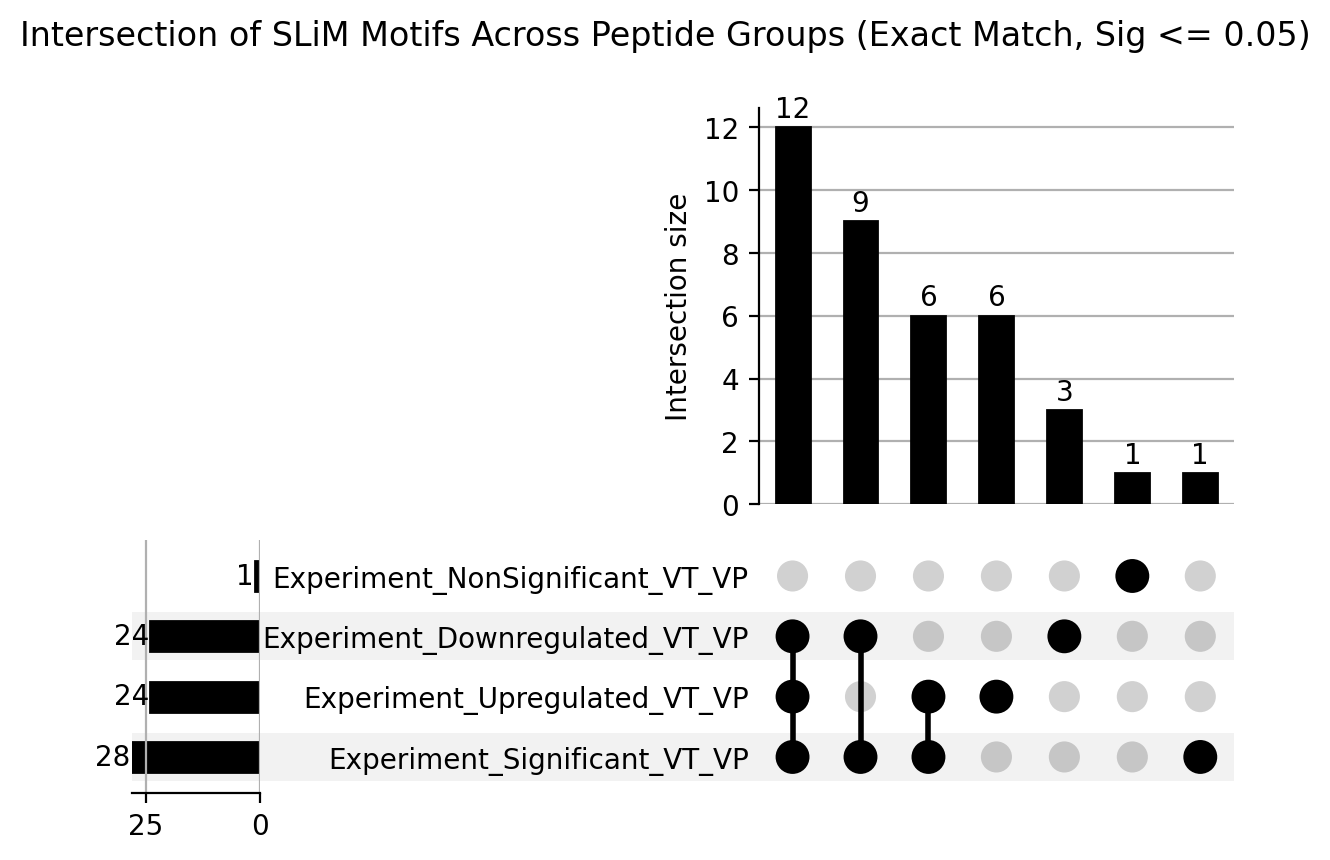


Calculating pairwise Jaccard Similarity...

Jaccard Similarity Matrix (rounded to 2 decimal places):
                                 Experiment_Significant_VT_VP  \
Experiment_Significant_VT_VP                             1.00   
Experiment_NonSignificant_VT_VP                          0.00   
Experiment_Upregulated_VT_VP                             0.53   
Experiment_Downregulated_VT_VP                           0.68   

                                 Experiment_NonSignificant_VT_VP  \
Experiment_Significant_VT_VP                                 0.0   
Experiment_NonSignificant_VT_VP                              1.0   
Experiment_Upregulated_VT_VP                                 0.0   
Experiment_Downregulated_VT_VP                               0.0   

                                 Experiment_Upregulated_VT_VP  \
Experiment_Significant_VT_VP                             0.53   
Experiment_NonSignificant_VT_VP                          0.00   
Experiment_Upregulated_VT_VP        

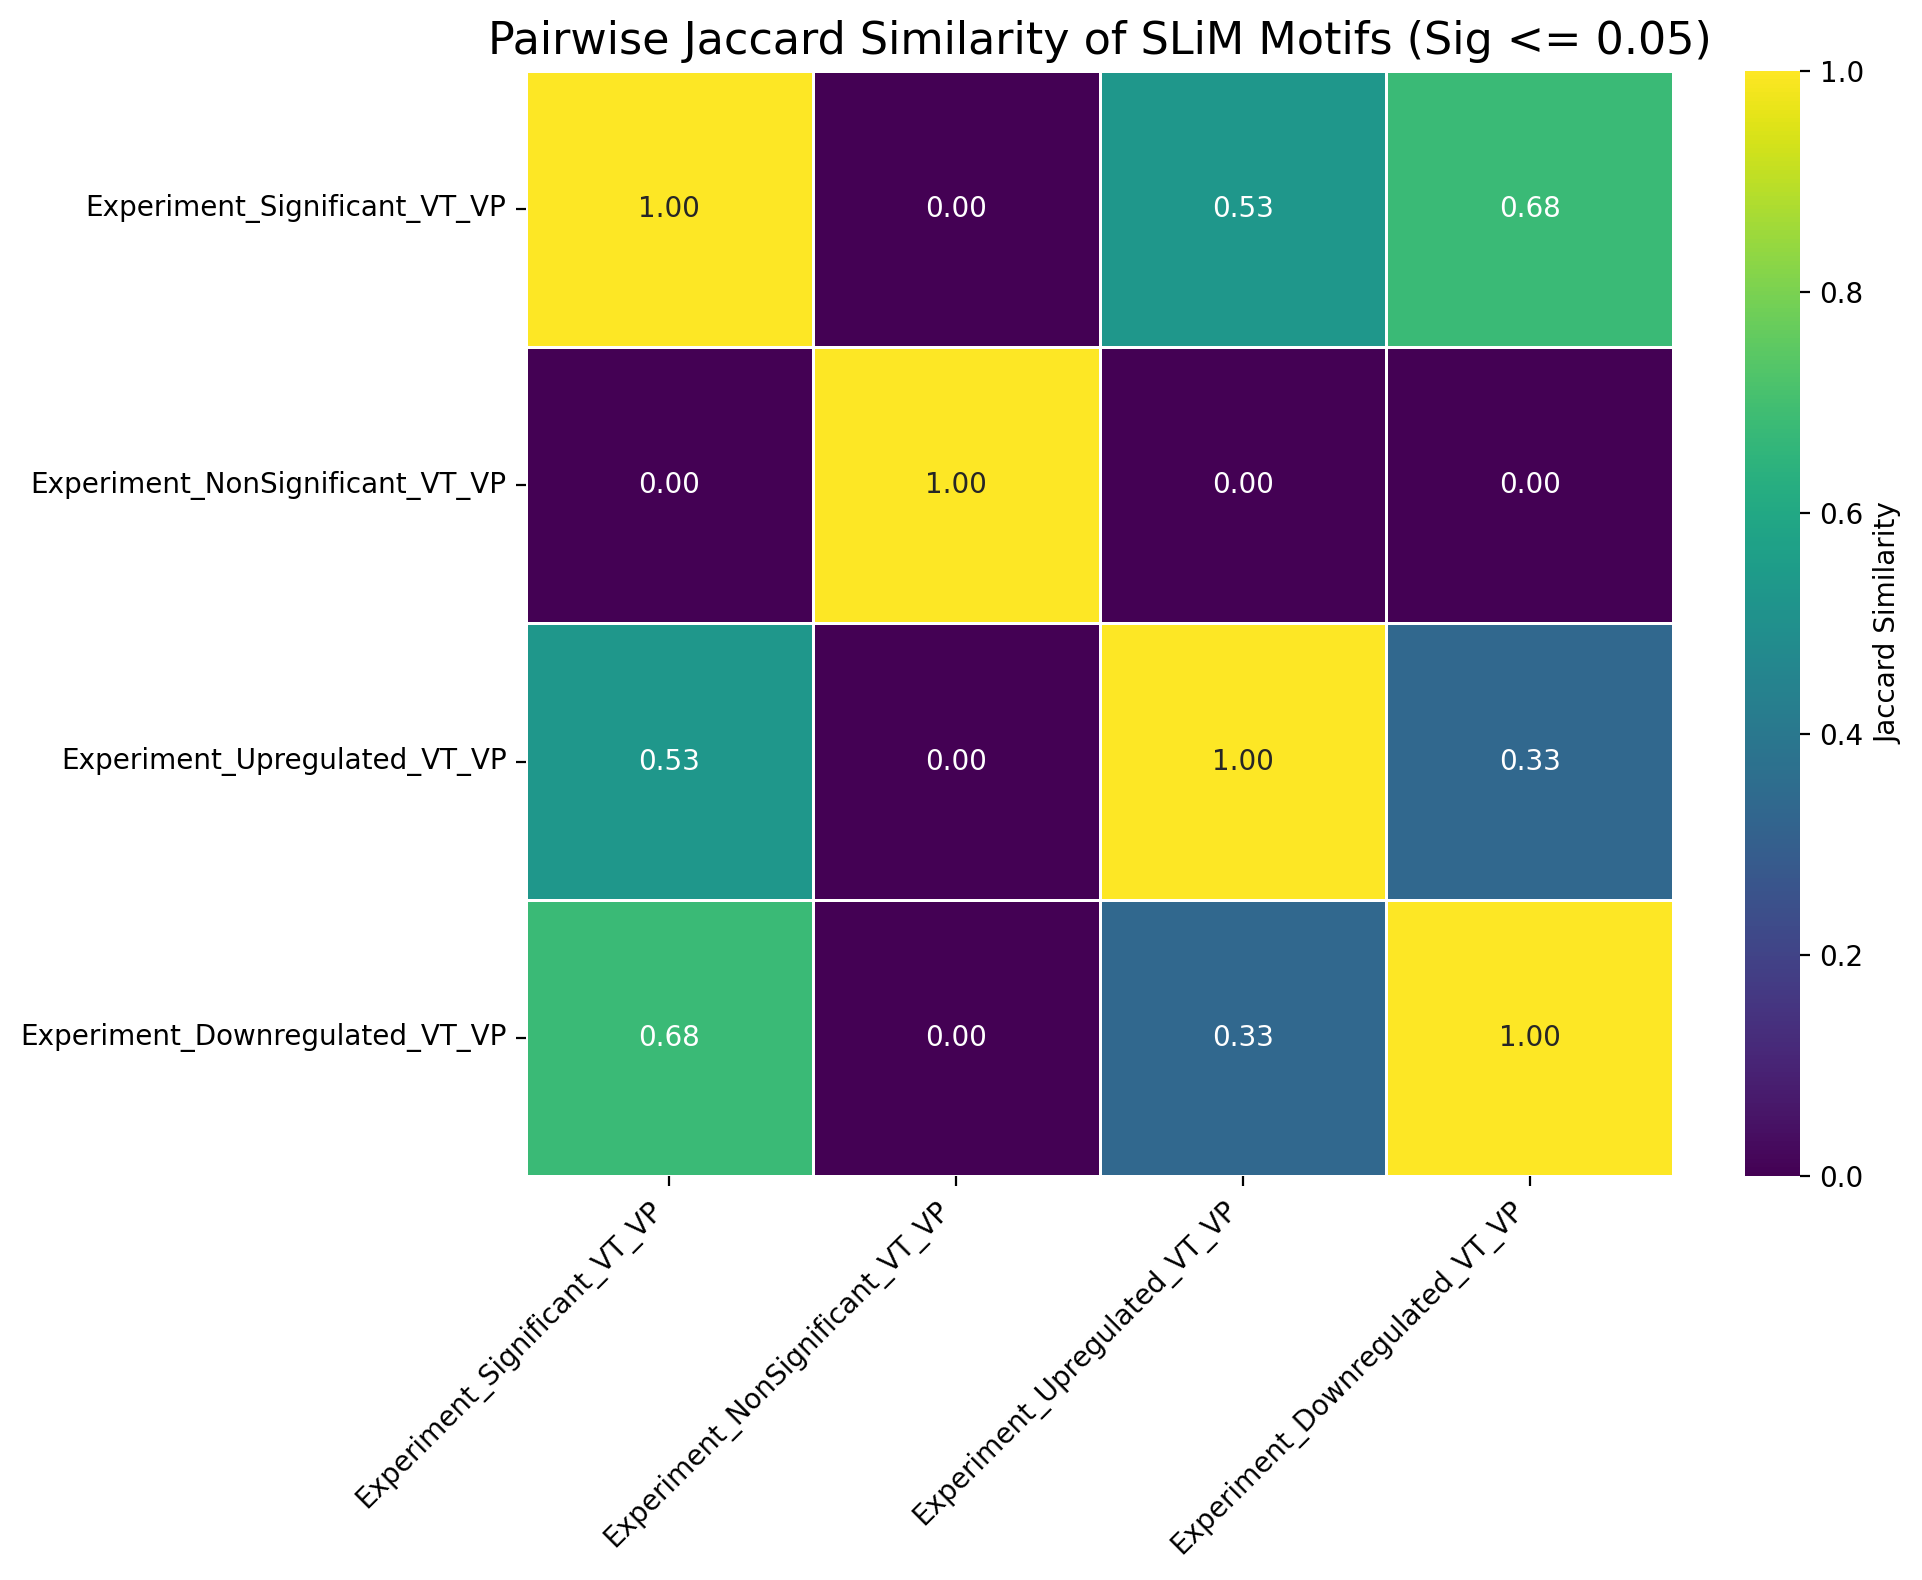


Generating Venn Diagram...
Using venny4py for 4-set Venn diagram.


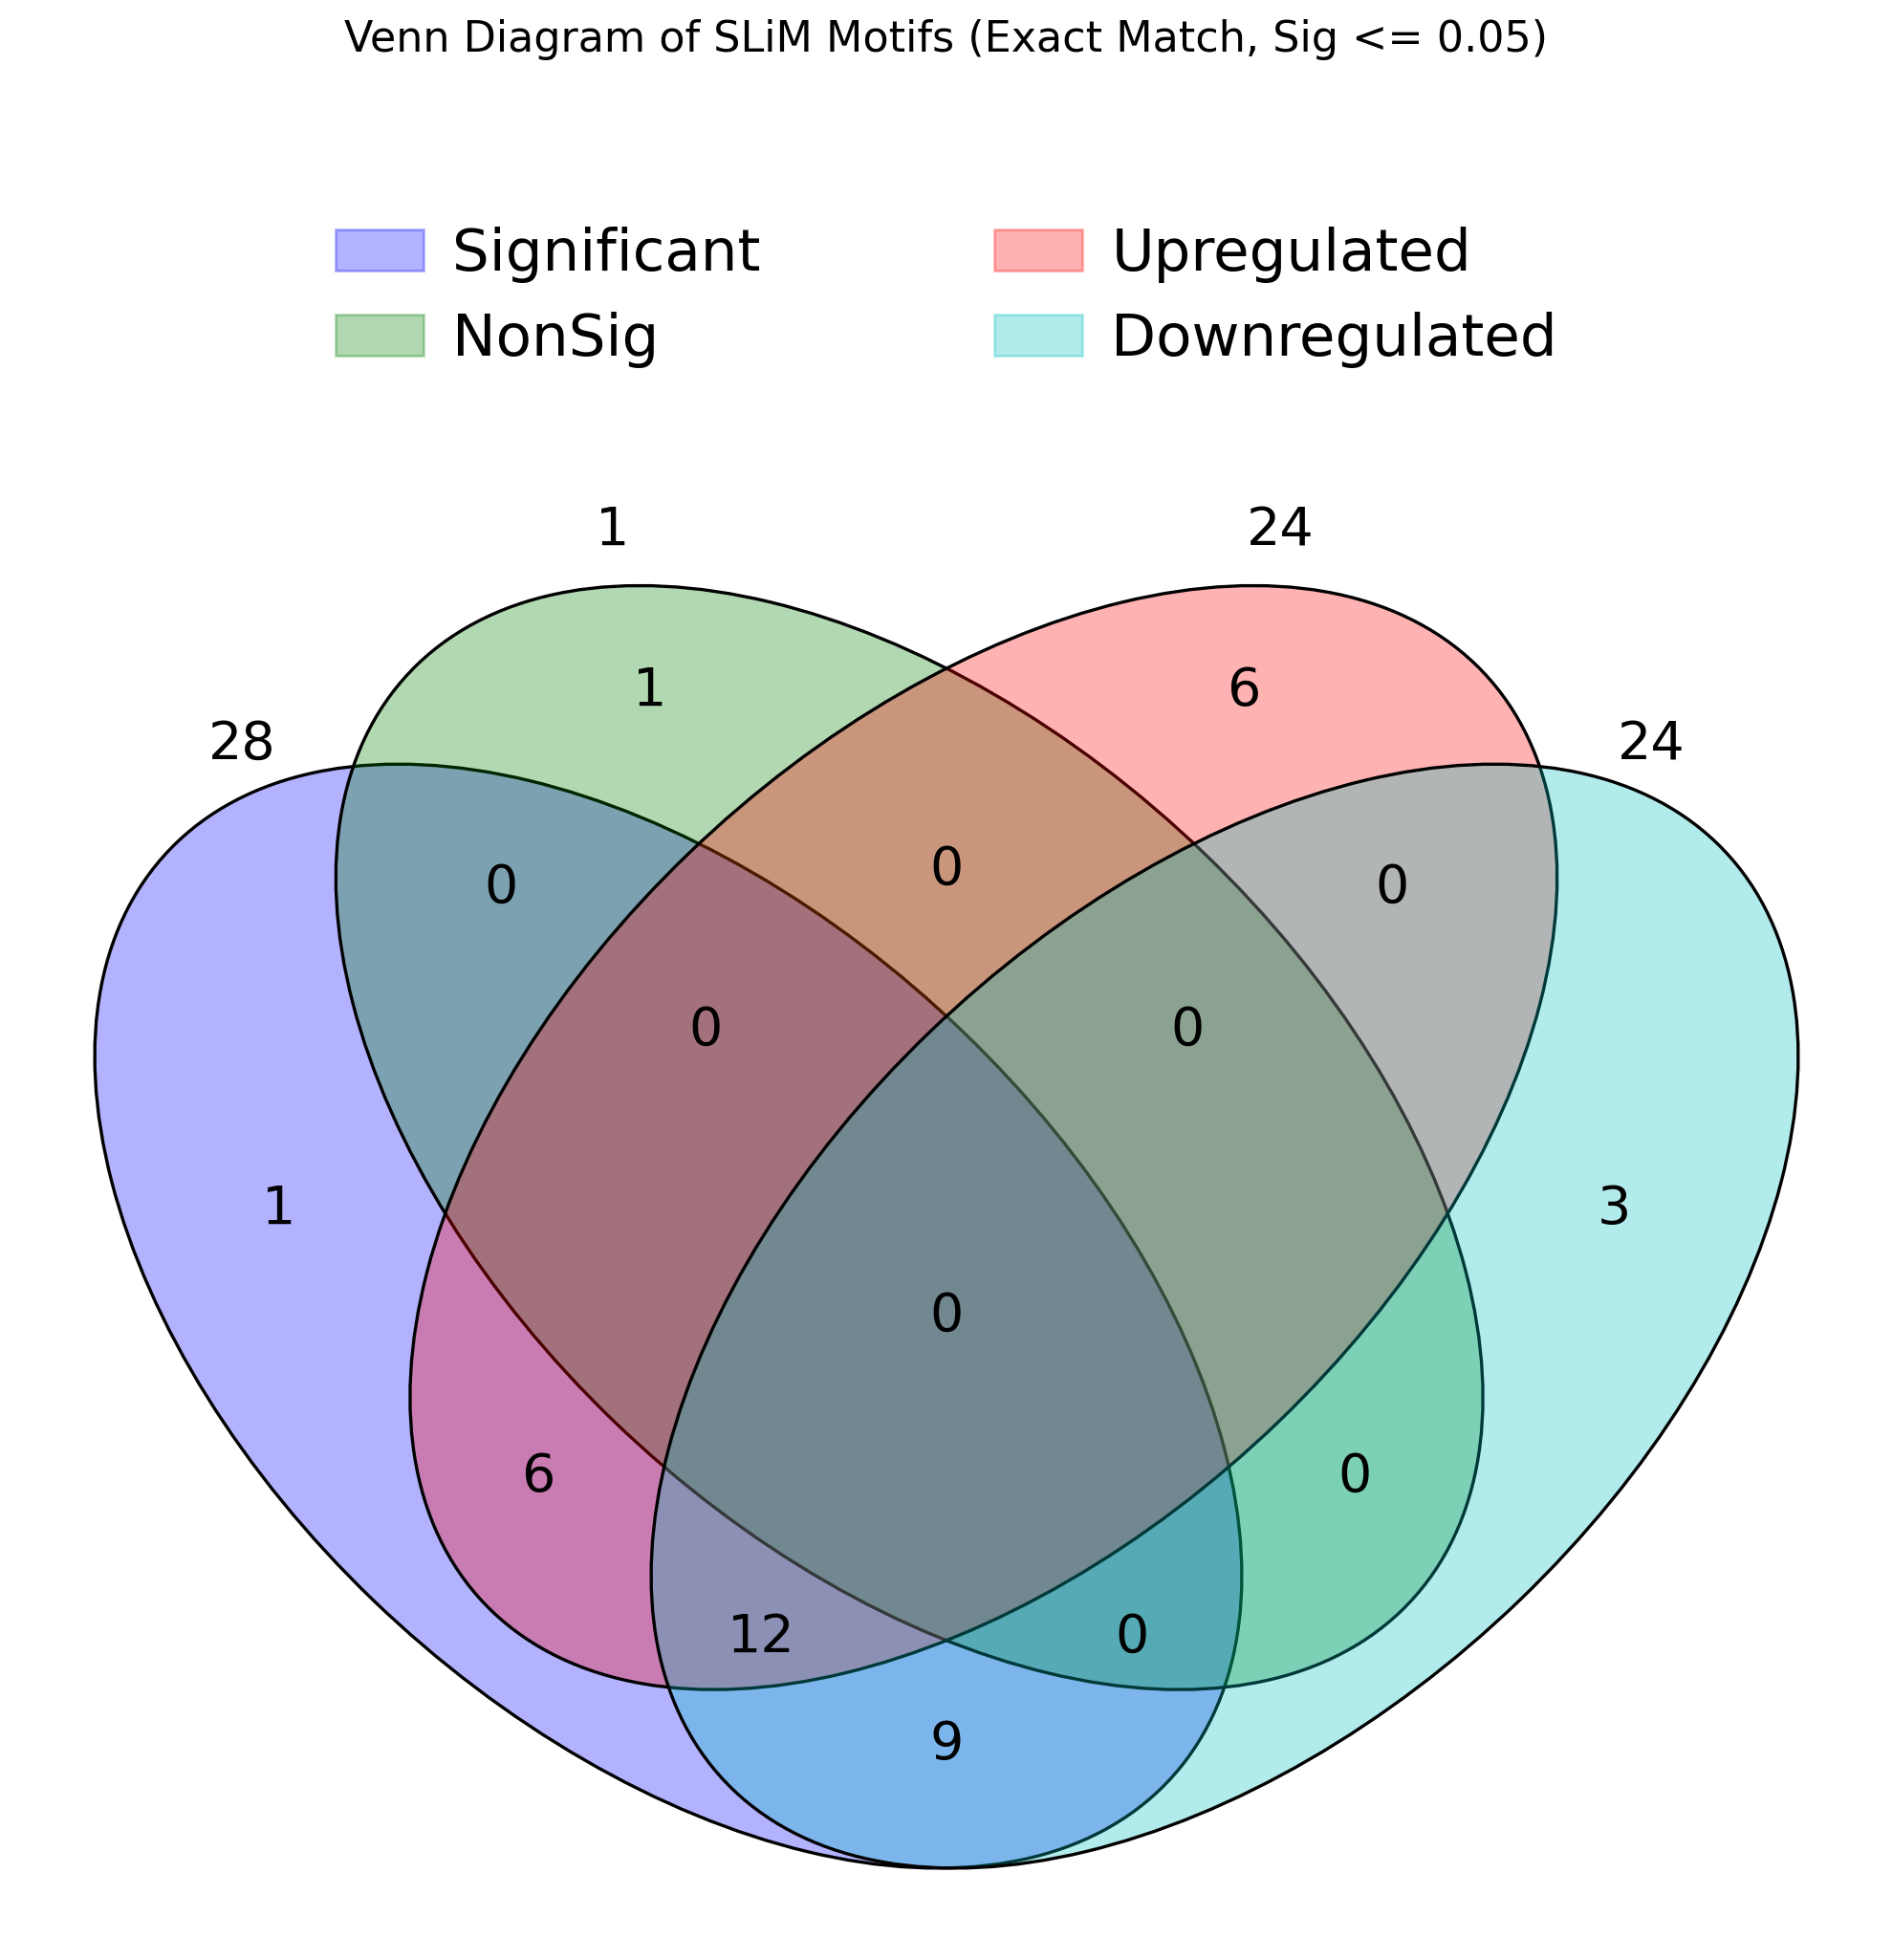


Comparison complete. Both UpSet plot and Jaccard Similarity Heatmap displayed.
Note: This comparison uses exact string matching of motif patterns and considers only motifs with Sig <= 0.05.
If 'upsetplot' is not found, please install it using: pip install upsetplot


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import from_contents, plot
from matplotlib_venn import venn2, venn3 
from venny4py.venny4py import venny4py 
import sys

# --- Configuration ---
# Adjust this path to your combined SLiMFinder results file
SLIMFINDER_RESULTS_PATH = "/projectnb/cancergrp/Philipp/results/RITA_peptides/slimfinder_analyses/" 
SLIMFINDER_COMBINED_RESULTS_PATH = f"{SLIMFINDER_RESULTS_PATH}all_groups_slimfinder_combined_results.csv" 

# Significance threshold for motifs to be considered for comparison.
# SLiMFinder often reports 0.0 for highly significant motifs, so Sig <= 0.05 will include them.
SIGNIFICANCE_CUTOFF = 0.05 

# --- Load Data ---
try:
    df_results = pd.read_csv(SLIMFINDER_COMBINED_RESULTS_PATH)
    print(f"Loaded {len(df_results)} motif entries from {SLIMFINDER_COMBINED_RESULTS_PATH}")
except FileNotFoundError:
    print(f"Error: File not found at {SLIMFINDER_COMBINED_RESULTS_PATH}")
    print("Please ensure the path is correct and the SLiMFinder combined results CSV exists.")
    print(f"Expected path: {SLIMFINDER_COMBINED_RESULTS_PATH}")
    sys.exit(1) # Exit gracefully if file not found



# --- Data Preprocessing ---
# Convert 'Sig' to numeric, coercing errors to NaN.
df_results['Sig'] = pd.to_numeric(df_results['Sig'], errors='coerce')

# Filter for significant motifs based on the defined cutoff
# Motifs with Sig=0.0 are included as they are highly significant.
df_significant_motifs = df_results[df_results['Sig'] <= SIGNIFICANCE_CUTOFF].copy()

if df_significant_motifs.empty:
    print(f"No significant motifs found after filtering with Sig <= {SIGNIFICANCE_CUTOFF}.")
    print("Consider adjusting the SIGNIFICANCE_CUTOFF or checking your SLiMFinder run parameters.")
    sys.exit(0) # Exit if no significant motifs

print(f"Retained {len(df_significant_motifs)} significant motifs (Sig <= {SIGNIFICANCE_CUTOFF}) for comparison.")

# Extract unique group names from the filtered data
groups = df_significant_motifs['Group'].unique()
print(f"Found {len(groups)} unique groups: {', '.join(groups)}")

# Create a dictionary of sets, where each set contains the unique significant motif patterns for a group
motif_sets = {}
for group in groups:
    # Get unique patterns for the current group from the significant motifs DataFrame
    motif_sets[group] = set(df_significant_motifs[df_significant_motifs['Group'] == group]['Pattern'].unique())

print("\n--- Significant Motif Set Summary ---")
for group_name, motifs in motif_sets.items():
    print(f"{group_name}: {len(motifs)} unique significant motifs")

# Remove groups that have no significant motifs after filtering for cleaner plots
motif_sets = {group: motifs for group, motifs in motif_sets.items() if len(motifs) > 0}
groups = list(motif_sets.keys()) # Update groups list for plotting

if len(groups) < 2:
    print("\nNot enough groups with significant motifs to perform a meaningful intersection comparison.")
    sys.exit(0)

# --- Visualization 1: UpSet Plot ---
print("\nGenerating UpSet plot for motif intersections...")

# Convert motif_sets to a format suitable for upsetplot
motif_data = from_contents(motif_sets)

plot(motif_data, show_counts=True, sort_by='cardinality')
plt.suptitle(f'Intersection of SLiM Motifs Across Peptide Groups (Exact Match, Sig <= {SIGNIFICANCE_CUTOFF})')
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.savefig(f"{SLIMFINDER_RESULTS_PATH}motif_overlaps_upset-plot.png")
plt.show()


# --- Visualization 2: Pairwise Jaccard Similarity Heatmap ---
print("\nCalculating pairwise Jaccard Similarity...")

# Initialize a matrix to store Jaccard indices
jaccard_matrix = pd.DataFrame(index=groups, columns=groups, dtype=float)

# Calculate Jaccard similarity for all pairs of groups
group_names = list(motif_sets.keys())
for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        set1 = motif_sets[group1]
        set2 = motif_sets[group2]
        
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        
        # Jaccard similarity is 1.0 if both sets are empty (perfect similarity, no motifs at all)
        # Otherwise, if union is 0 (which would only happen if both sets are empty) or if no intersection, it's 0.0 or calculated.
        if len(set1) == 0 and len(set2) == 0:
            jaccard_similarity = 1.0
        elif union == 0: # Should not happen if at least one set is non-empty, but for safety
            jaccard_similarity = 0.0
        else:
            jaccard_similarity = intersection / union
        
        jaccard_matrix.loc[group1, group2] = jaccard_similarity

print("\nJaccard Similarity Matrix (rounded to 2 decimal places):")
print(jaccard_matrix.round(2)) 

plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Jaccard Similarity'})
plt.title(f'Pairwise Jaccard Similarity of SLiM Motifs (Sig <= {SIGNIFICANCE_CUTOFF})', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{SLIMFINDER_RESULTS_PATH}motif_jaccard_heatmap.png")
plt.show()


# --- Visualization 3: Venn Diagram (for up to 4 sets) ---
print("\nGenerating Venn Diagram...")

# Shorten group names for better readability in Venn diagram
short_group_names = {
    'Experiment_Significant_VT_VP': 'Significant',
    'Experiment_NonSignificant_VT_VP': 'NonSig',
    'Experiment_Upregulated_VT_VP': 'Upregulated',
    'Experiment_Downregulated_VT_VP': 'Downregulated'
}

# Prepare data for matplotlib_venn (if used) or venny4py
venn_sets = []
venn_labels = []
for group_name in groups:
    venn_sets.append(motif_sets[group_name])
    venn_labels.append(short_group_names.get(group_name, group_name))


if len(groups) == 4:
    # Use venny4py for 4 sets
    print("Using venny4py for 4-set Venn diagram.")
    venn_data_for_plot = {
        venn_labels[0]: venn_sets[0],
        venn_labels[1]: venn_sets[1],
        venn_labels[2]: venn_sets[2],
        venn_labels[3]: venn_sets[3]
    }
    
    venny4py(sets=venn_data_for_plot, size=10) # size can be adjusted for clarity
    plt.suptitle(f'Venn Diagram of SLiM Motifs (Exact Match, Sig <= {SIGNIFICANCE_CUTOFF})', fontsize=16, y=1.02)
    plt.tight_layout()

elif len(groups) == 3:
    # Use matplotlib_venn.venn3 for 3 sets
    print("Using matplotlib_venn.venn3 for 3-set Venn diagram.")
    plt.figure(figsize=(10, 10))
    venn3(venn_sets, set_labels=venn_labels)
    plt.title(f'Venn Diagram of SLiM Motifs (Exact Match, Sig <= {SIGNIFICANCE_CUTOFF})', fontsize=16)
    plt.tight_layout()

elif len(groups) == 2:
    # Use matplotlib_venn.venn2 for 2 sets
    print("Using matplotlib_venn.venn2 for 2-set Venn diagram.")
    plt.figure(figsize=(8, 8))
    venn2(venn_sets, set_labels=venn_labels)
    plt.title(f'Venn Diagram of SLiM Motifs (Exact Match, Sig <= {SIGNIFICANCE_CUTOFF})', fontsize=16)
    plt.tight_layout()

else:
    print(f"\nSkipping Venn diagram: No dedicated function for {len(groups)} groups with current libraries (supported: 2, 3, 4).")

plt.savefig(f"{SLIMFINDER_RESULTS_PATH}motif_overlaps_venn-diagram.png")
plt.show()


print("\nComparison complete. Both UpSet plot and Jaccard Similarity Heatmap displayed.")
print(f"Note: This comparison uses exact string matching of motif patterns and considers only motifs with Sig <= {SIGNIFICANCE_CUTOFF}.")
print("If 'upsetplot' is not found, please install it using: pip install upsetplot")